In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/rd/train.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [5]:
df.shape

(29451, 12)

In [6]:
df.nunique(axis=0)

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [8]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [9]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [10]:
df = df.rename(columns={'TARGET(PRICE_IN_LACS)':'PRICE_IN_LACS'})

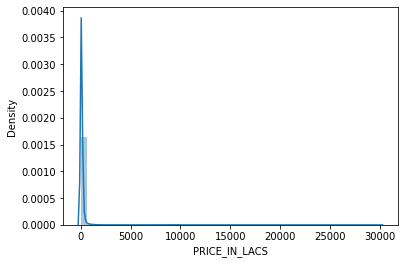



skewness: 17.583332
kurtosis: 451.934779


In [11]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

import warnings
warnings.filterwarnings("ignore")

#kernel density plot
sns.distplot(df.PRICE_IN_LACS)
plt.show()
print('\n')
print("skewness: %f" % df['PRICE_IN_LACS'].skew())
print("kurtosis: %f" % df ['PRICE_IN_LACS'].kurt())

In [12]:
def diagnostic_plot(df,variable):
  #function to plot histogram and Q-Qplot
  #side by side for a criteria data

  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  df[variable].hist()

  plt.subplot(1,2,1)
  stats.probplot(df[variable],dist='norm',plot=plt)
  plt.show()

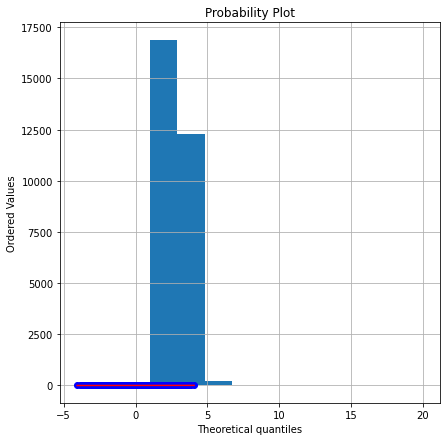

In [13]:
diagnostic_plot(df,'BHK_NO.')

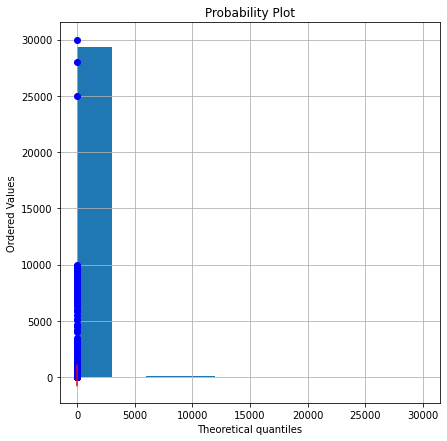

In [14]:
diagnostic_plot(df,'PRICE_IN_LACS')

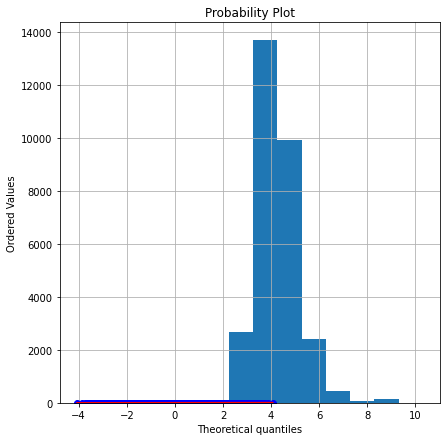

In [15]:
df['log_PRICE_IN_LACS']=np.log(df['PRICE_IN_LACS']+1)
diagnostic_plot(df,'log_PRICE_IN_LACS')

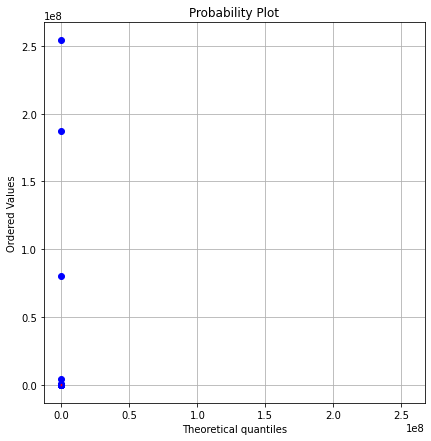

In [16]:
diagnostic_plot(df,'SQUARE_FT')

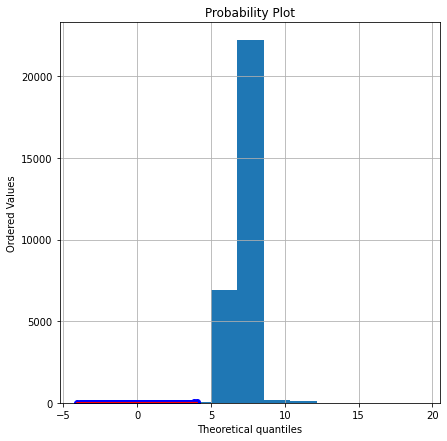

In [17]:
df['log_SQUARE_FT']=np.log(df['SQUARE_FT']+1)
diagnostic_plot(df,'log_SQUARE_FT')

In [18]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE_IN_LACS,log_PRICE_IN_LACS,log_SQUARE_FT
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,4.025352,7.171070
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,3.951244,7.151485
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,3.784190,6.839647
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,4.151040,6.836175
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,4.119037,6.907765


In [19]:
df=df.drop(['SQUARE_FT','PRICE_IN_LACS',],axis=1)

In [20]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,log_PRICE_IN_LACS,log_SQUARE_FT
0,Owner,0,0,2,BHK,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,4.025352,7.171070
1,Dealer,0,0,2,BHK,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,3.951244,7.151485
2,Owner,0,0,2,BHK,1,1,"Jigani,Bangalore",12.778033,77.632191,3.784190,6.839647
3,Owner,0,1,2,BHK,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,4.151040,6.836175
4,Dealer,1,0,2,BHK,0,1,"New Town,Kolkata",22.592200,88.484911,4.119037,6.907765


In [21]:
print('Current feature order:',df.columns.tolist())

Current feature order: ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE', 'log_PRICE_IN_LACS', 'log_SQUARE_FT']


In [22]:
new_order=['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE', 'LATITUDE', 'log_SQUARE_FT', 'log_PRICE_IN_LACS']

In [23]:
df=df[new_order]

In [24]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,log_SQUARE_FT,log_PRICE_IN_LACS
0,Owner,0,0,2,BHK,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,7.171070,4.025352
1,Dealer,0,0,2,BHK,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,7.151485,3.951244
2,Owner,0,0,2,BHK,1,1,"Jigani,Bangalore",12.778033,77.632191,6.839647,3.784190
3,Owner,0,1,2,BHK,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,6.836175,4.151040
4,Dealer,1,0,2,BHK,0,1,"New Town,Kolkata",22.592200,88.484911,6.907765,4.119037


In [25]:
df.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
log_SQUARE_FT         0
log_PRICE_IN_LACS     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           29451 non-null  object 
 1   UNDER_CONSTRUCTION  29451 non-null  int64  
 2   RERA                29451 non-null  int64  
 3   BHK_NO.             29451 non-null  int64  
 4   BHK_OR_RK           29451 non-null  object 
 5   READY_TO_MOVE       29451 non-null  int64  
 6   RESALE              29451 non-null  int64  
 7   ADDRESS             29451 non-null  object 
 8   LONGITUDE           29451 non-null  float64
 9   LATITUDE            29451 non-null  float64
 10  log_SQUARE_FT       29451 non-null  float64
 11  log_PRICE_IN_LACS   29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [27]:
df.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,log_SQUARE_FT,log_PRICE_IN_LACS
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-1.000000,-0.347405,0.006440,-0.000381,-0.062163,0.048011
RERA,0.363826,1.000000,0.009547,-0.363826,-0.270351,0.104976,-0.065106,0.025315,0.142783
BHK_NO.,-0.040712,0.009547,1.000000,0.040712,0.014581,0.068730,0.046930,0.635419,0.479669
READY_TO_MOVE,-1.000000,-0.363826,0.040712,1.000000,0.347405,-0.006440,0.000381,0.062163,-0.048011
RESALE,-0.347405,-0.270351,0.014581,0.347405,1.000000,0.024038,0.014844,-0.023094,-0.095394
LONGITUDE,0.006440,0.104976,0.068730,-0.006440,0.024038,1.000000,-0.155062,0.034733,-0.128566
LATITUDE,-0.000381,-0.065106,0.046930,0.000381,0.014844,-0.155062,1.000000,0.021701,-0.062802
log_SQUARE_FT,-0.062163,0.025315,0.635419,0.062163,-0.023094,0.034733,0.021701,1.000000,0.635187
log_PRICE_IN_LACS,0.048011,0.142783,0.479669,-0.048011,-0.095394,-0.128566,-0.062802,0.635187,1.000000


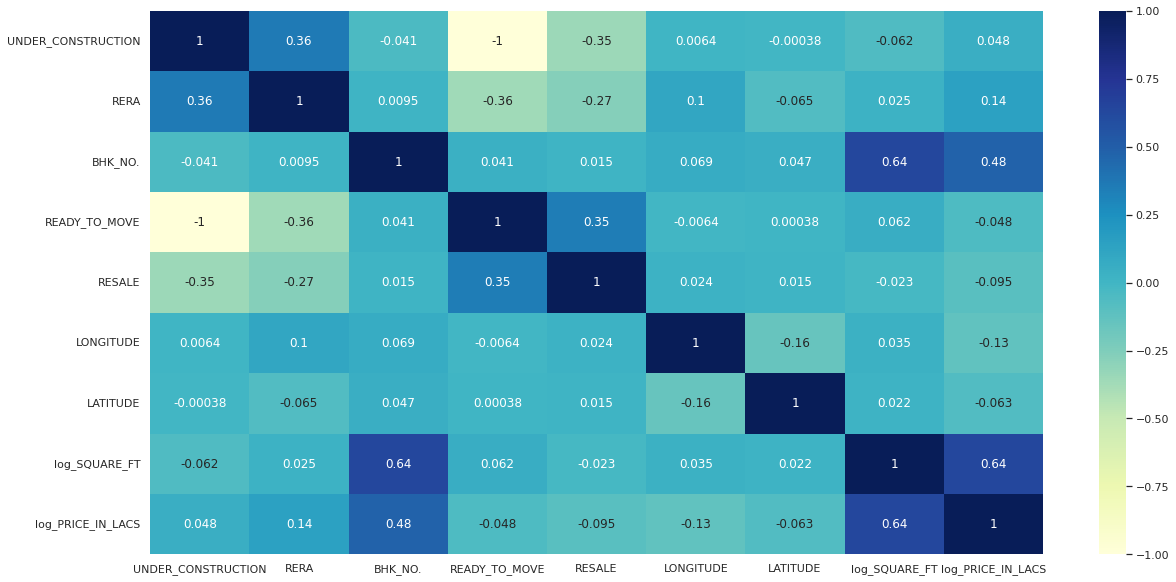

In [28]:
# features correlation with  visualization using seaborn
sns.set(rc={'figure.figsize': (20, 10)})
sns .heatmap(df.corr(),annot=True,annot_kws={'size':12},cmap="YlGnBu")
plt.show()

In [29]:
#to get only numerical cols 
num=df._get_numeric_data() 
num.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,log_SQUARE_FT,log_PRICE_IN_LACS
0,0,0,2,1,1,12.969910,77.597960,7.171070,4.025352
1,0,0,2,1,1,12.274538,76.644605,7.151485,3.951244
2,0,0,2,1,1,12.778033,77.632191,6.839647,3.784190
3,0,1,2,1,1,28.642300,77.344500,6.836175,4.151040
4,1,0,2,0,1,22.592200,88.484911,6.907765,4.119037


In [30]:
#to get only cat cols and changing it as categorical from object 
cat=df.drop(num,axis=1)
cat=cat.astype('category')
cat.head()

,POSTED_BY,BHK_OR_RK,ADDRESS
0,Owner,BHK,"Ksfc Layout,Bangalore"
1,Dealer,BHK,"Vishweshwara Nagar,Mysore"
2,Owner,BHK,"Jigani,Bangalore"
3,Owner,BHK,"Sector-1 Vaishali,Ghaziabad"
4,Dealer,BHK,"New Town,Kolkata"


In [31]:
cat.BHK_OR_RK.value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [32]:
cat.ADDRESS.value_counts()

Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
Lower Thather Bantalab,Jammu       1
Lower Bharari,Shimla               1
Louis Wadi,Maharashtra             1
Lottegolla Halli,Bangalore         1
yelahanka/Jakkur,Bangalore         1
Name: ADDRESS, Length: 6899, dtype: int64

In [33]:
cat_cols=cat.columns
cat_cols

Index(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'], dtype='object')

In [34]:
#converting the target variable as num by using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [35]:
for col in cat_cols:
    cat[col] = le.fit_transform(cat[col])


In [36]:
cat.head()

,POSTED_BY,BHK_OR_RK,ADDRESS
0,2,0,2844
1,1,0,6576
2,2,0,2256
3,2,0,5095
4,1,0,3830


In [37]:
final_df=cat.join(num)

In [38]:
final_df.head()

,POSTED_BY,BHK_OR_RK,ADDRESS,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,log_SQUARE_FT,log_PRICE_IN_LACS
0,2,0,2844,0,0,2,1,1,12.969910,77.597960,7.171070,4.025352
1,1,0,6576,0,0,2,1,1,12.274538,76.644605,7.151485,3.951244
2,2,0,2256,0,0,2,1,1,12.778033,77.632191,6.839647,3.784190
3,2,0,5095,0,1,2,1,1,28.642300,77.344500,6.836175,4.151040
4,1,0,3830,1,0,2,0,1,22.592200,88.484911,6.907765,4.119037


In [39]:
X=final_df.drop(['log_PRICE_IN_LACS'],axis=1)
y=final_df.drop(X,axis=1)

In [40]:
#importing the spliting slibraries to split the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.25,shuffle=True)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pr = PolynomialFeatures()


In [43]:
x_poly = pr.fit_transform(x_train)

In [44]:
model = LinearRegression()
m1=model.fit(x_poly,y_train)

In [45]:
#pridict the data of train after fitting
y_pred = model.predict(x_poly)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

In [48]:
# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.33
Mean Absolute Error (MAE): 0.43
Root Mean Squared Error (RMSE): 0.57
R-squared (R2): 0.59


In [49]:
pr = PolynomialFeatures()
x_poly1 = pr.fit_transform(x_test)

In [50]:
#pridict the data of train after fitting
y_pred = model.predict(x_poly1)

In [51]:
mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)
rmse1 = np.sqrt(mse)
r21 = r2_score(y_test, y_pred)

In [52]:
# Print the results
print(f"Mean Squared Error (MSE): {mse1:.2f}")
print(f"Mean Absolute Error (MAE): {mae1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse1:.2f}")
print(f"R-squared (R2): {r21:.2f}")

Mean Squared Error (MSE): 0.32
Mean Absolute Error (MAE): 0.43
Root Mean Squared Error (RMSE): 0.57
R-squared (R2): 0.59


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [54]:
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])


In [55]:
param_grid = {
    'poly__degree': [ 4, 5]
}


In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5)
mod=grid_search.fit(x_poly,y_train)
